# 1. Modelo de Goodwin

Considere un mecanismo de regulación de la expresión de un gen:
\begin{align*}
\frac{dm}{dt} &= \alpha_m g_R(p) − \beta_m m, \\
\frac{de}{dt} &= \alpha_e m − \beta_e e, \\
\frac{dp}{dt} &= \alpha_p e − \beta_p p,
\end{align*}
donde $m$ es la concentración del mRNA, que produce una enzima $e$, que contribuye a la producción de una proteína $p$. La regulación está controlada por la proteína, con una función de represión de la forma: $$g_R(p) = \frac{a}{b + c p^h}.$$

Analice la dinámica para algunos valores del exponente de Hill $h$, y encuentre al menos una situación que tenga oscilaciones de las concentraciones.

Como valores indicativos de los parámetros, puede usar: $\alpha_m = \alpha_e = \alpha_p = 1$, $a = b = c = 1$, $\beta_m = \beta_e = \beta_p = 0.1$. Observe que, en una situación en la que el exponente de Hill permite oscilaciones, éstas también desaparecen si se aceleran las degradaciones $\beta$.

In [100]:
#Librerías
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from tqdm import tqdm
from models import goodwin_model

### Dinámica del modelo de Goodwin para distintos valores de $h$.

Realizamos simulaciones variando el exponente de Hill manteniendo fijo las tasas $\alpha_m = \alpha_e = \alpha_p = 1$, las degradaciones $\beta_m = \beta_e = \beta_p = 0.1$ y las constantes $a = b = c = 1$. Tomamos como condición inicial para las concentraciones de mARN, enzima y proteína los valores $m_0 = e_0 = p_0 = 0.1$

In [101]:
# Parámetros del sistema
alpha_m = 1.0
alpha_e = 1.0
alpha_p = 1.0
a = 1.0
b = 1.0
c = 1.0
beta_m = 0.1
beta_e = 0.1
beta_p = 0.1

h = [0.5, 1.0, 2.0, 7.0, 8.0, 12.0]  # Exponente de Hill

model_instance = []
for h_ in h:
    model_instance.append(goodwin_model(alpha_m, beta_m, alpha_e, beta_e, alpha_p, beta_p, a, b, c, h_))

In [102]:
# Condiciones iniciales y solución
y0 = [0.1, 0.1, 0.1]

t = np.linspace(0, 1000, 5000)

solution = []
for model_instance_ in model_instance:
    solution.append(odeint(model_instance_.model, y0, t))

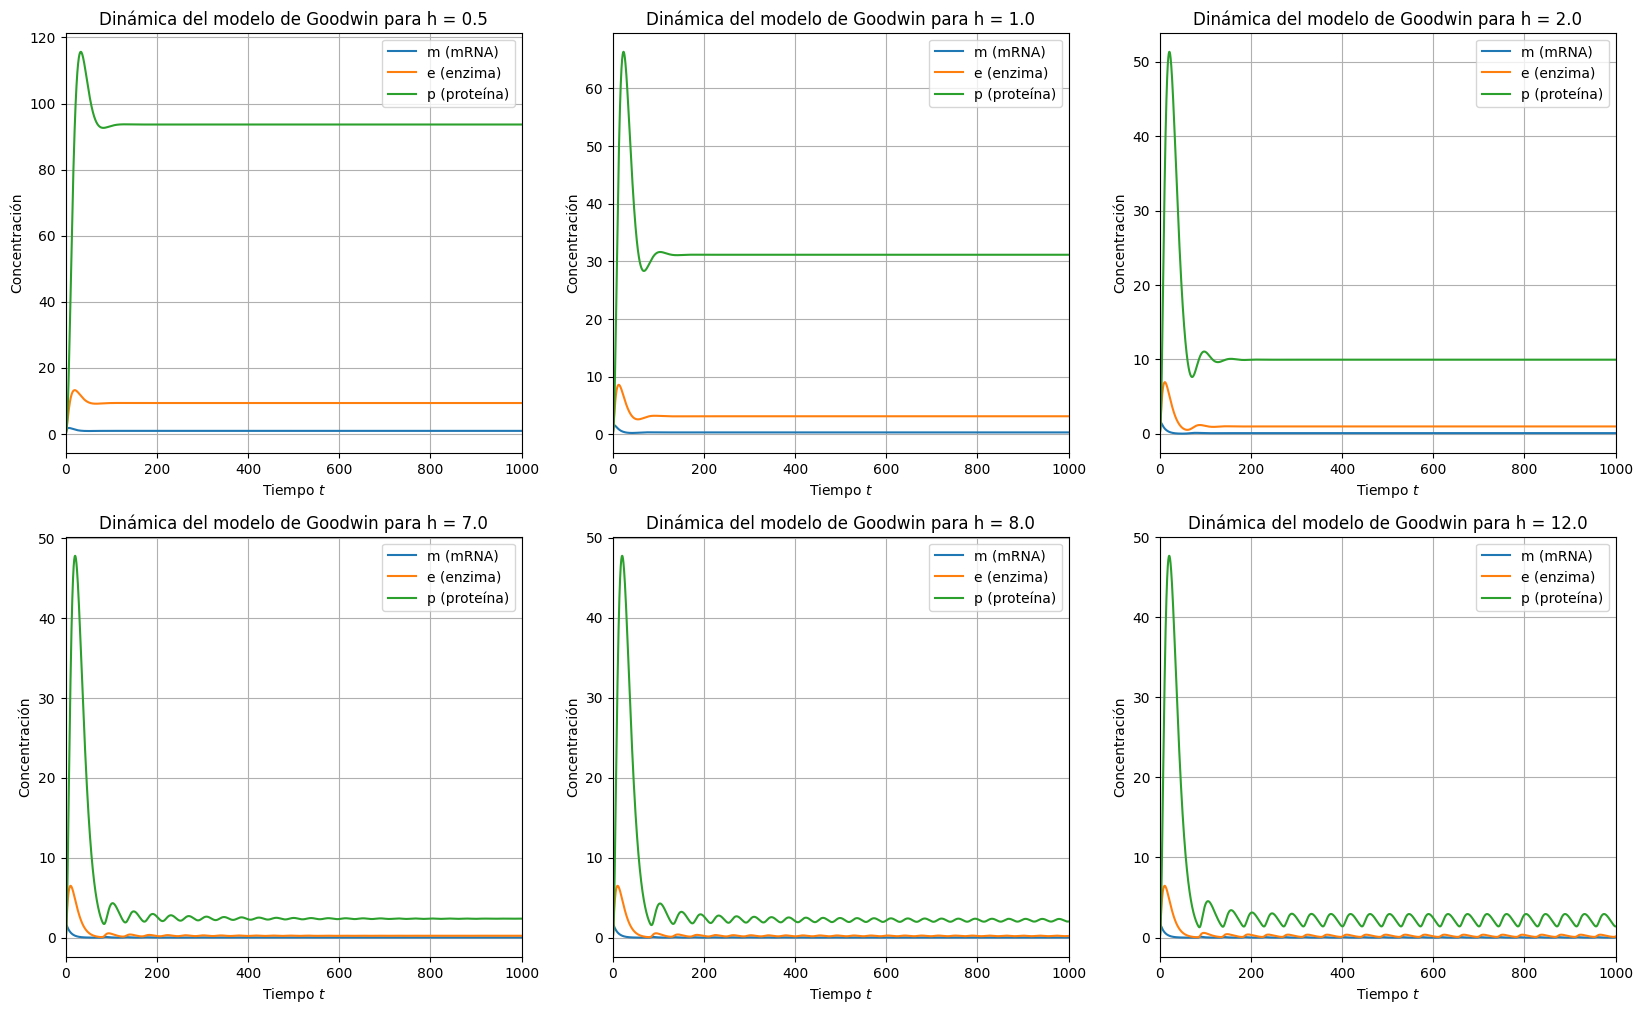

In [103]:
#Gráficas
plt.figure(figsize=(20, 12))

for i in range(len(h)):
    plt.subplot(2, 3, i+1)
    m = solution[i][:, 0]
    e = solution[i][:, 1]
    p = solution[i][:, 2]

    # Graficar los resultados
    plt.plot(t, m, label='m (mRNA)')
    plt.plot(t, e, label='e (enzima)')
    plt.plot(t, p, label='p (proteína)')
    plt.xlabel(f'Tiempo $t$')
    plt.ylabel(f'Concentración')
    plt.title(f'Dinámica del modelo de Goodwin para h = {h[i]}')
    plt.xlim(0, 1000)
    plt.legend()
    plt.grid(True)


Debido a que las concetraciones de proteinas son muy altas, grafiquemos mRNA, enzimas y proteínas por separado para ver mejor que sucede con cada una al variar $h$.

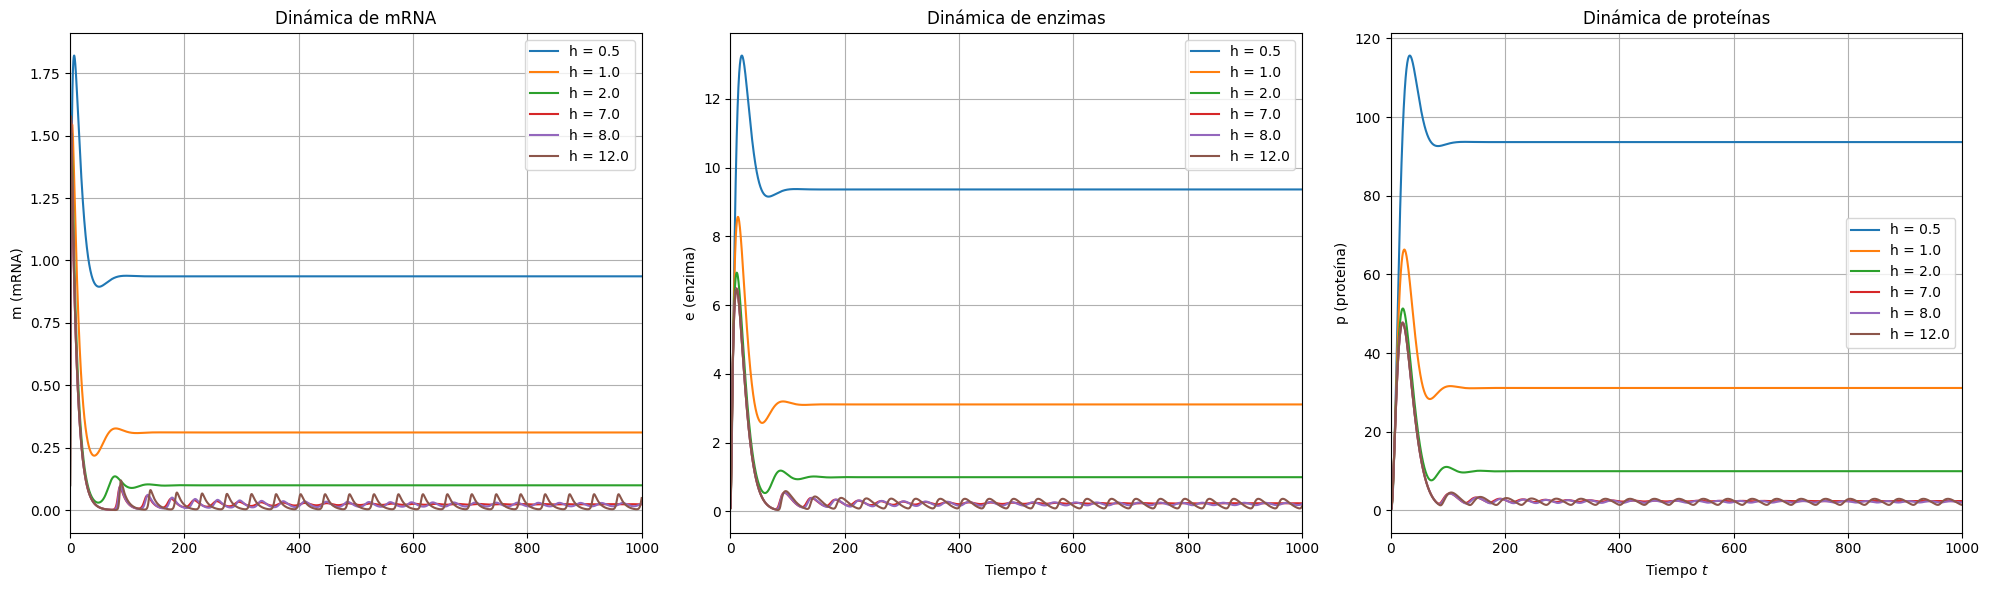

In [104]:
#Gráficas
plt.figure(figsize=(20, 6))

# Gráfico de mRNA
plt.subplot(1, 3, 1)
for i in range(len(h)):
    m = solution[i][:, 0]
    plt.plot(t, m, label=f'h = {h[i]}')
plt.xlabel('Tiempo $t$')
plt.ylabel('m (mRNA)')
plt.title('Dinámica de mRNA')
plt.legend()
plt.grid(True)
plt.xlim(0, 1000)

# Gráfico de enzimas
plt.subplot(1, 3, 2)
for i in range(len(h)):
    e = solution[i][:, 1]
    plt.plot(t, e, label=f'h = {h[i]}')
plt.xlabel('Tiempo $t$')
plt.ylabel('e (enzima)')
plt.title('Dinámica de enzimas')
plt.legend()
plt.grid(True)
plt.xlim(0, 1000)

# Gráfico de proteínas
plt.subplot(1, 3, 3)
for i in range(len(h)):
    p = solution[i][:, 2]
    plt.plot(t, p, label=f'h = {h[i]}')
plt.xlabel('Tiempo $t$')
plt.ylabel('p (proteína)')
plt.title('Dinámica de proteínas')
plt.legend()
plt.grid(True)
plt.xlim(0, 1000)
plt.tight_layout()
plt.show()

Ahora sí, veamos que para $h=0.5, 1.0, 2.0, 7.0$ las concentraciones tienden a estabilizarse en un valor constante luego de un transitorio. Además al aumentar $h$ disminuye el valor en que se estabilizan las concentraciones y aumenta el tiempo del transitorio. A partir de $h=8.0$ podemos ver oscilaciones sostenidas en el tiempo. Según el apunte de clases las oscilaciones sostenidas sólo son posibles para valores de $h \ge 8$, lo cual se consideran valores anormalmente grandes.

### Dinámica del modelo de Goodwin para distintos valores de $\beta = \beta_m = \beta_e = \beta_p$.

Veamos el comportamiento del sistema al aumentar el valor de las degradaciones $\beta$. Para esto tomamos $h=8.0, 10.0$ donde vimos que se obtienen oscilaciones sostenidas y realizamos graficas para valores más grandes de $\beta$, es decir para $\beta \ge 0.1$ y mismos valores de las tasas y las constantes que en el inciso anterior. 

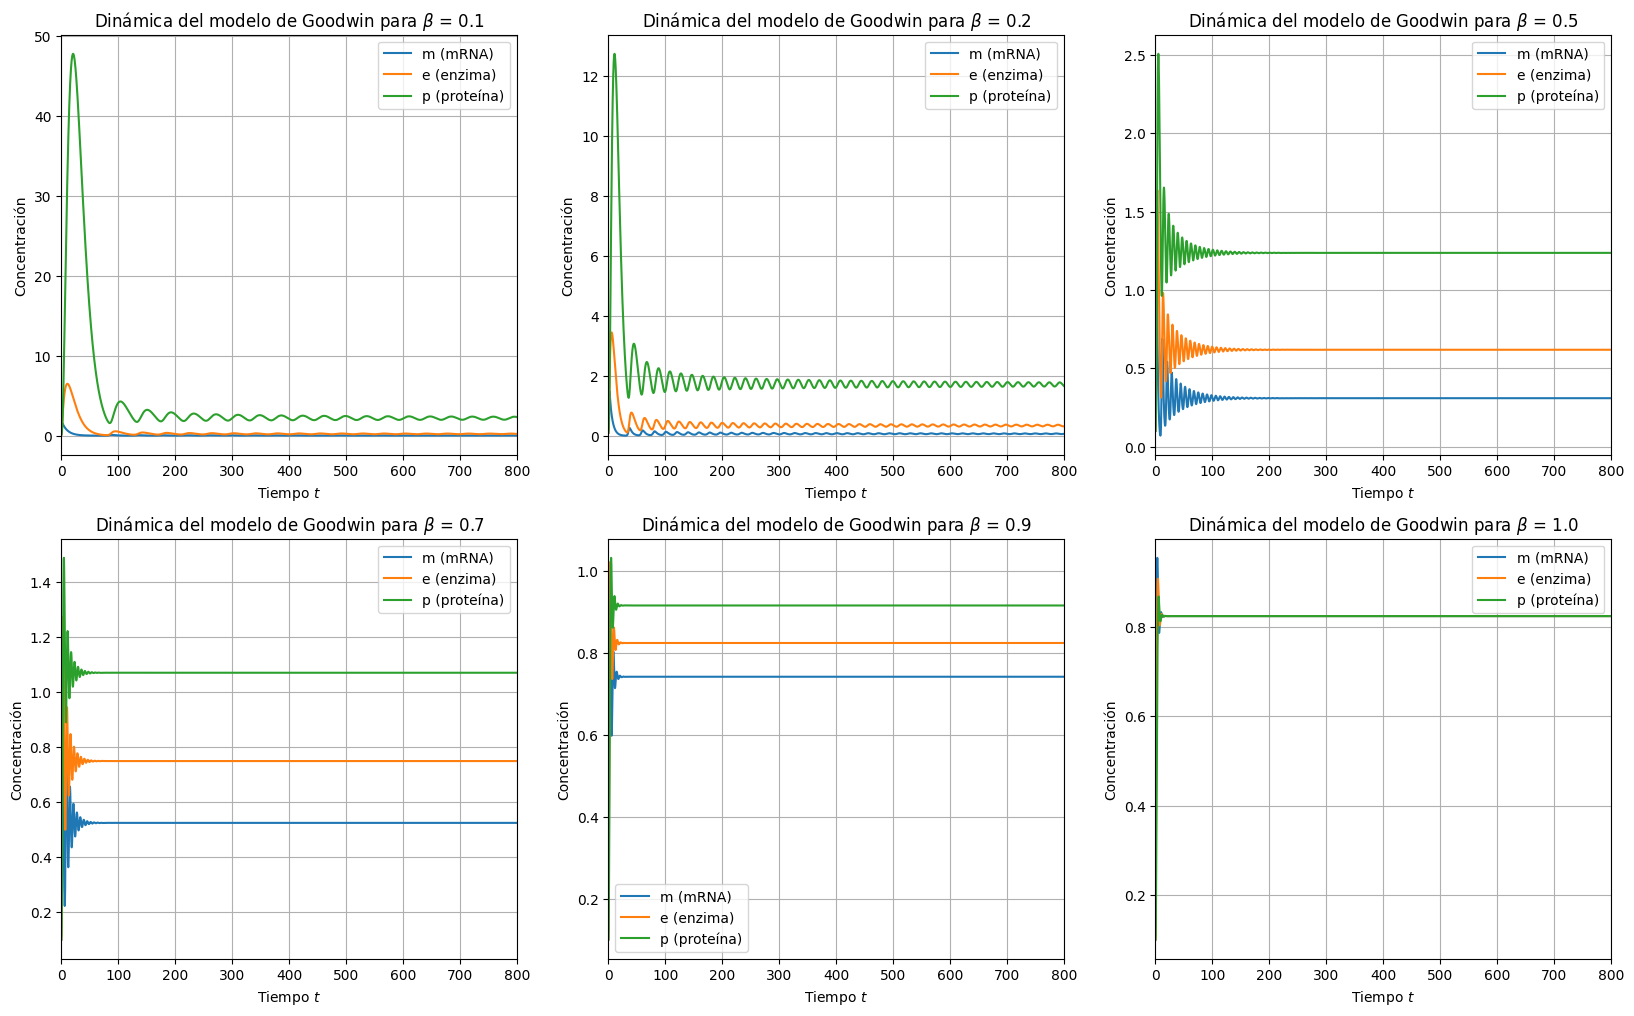

In [105]:
# h = 8.0
# Parámetros del sistema
alpha_m = 1.0
alpha_e = 1.0
alpha_p = 1.0
a = 1.0
b = 1.0
c = 1.0
beta = [0.1, 0.2, 0.5, 0.7, 0.9, 1.0]  
h = 8.0  # Exponente de Hill

model_instance = []
for beta_ in beta:
    model_instance.append(goodwin_model(alpha_m, beta_, alpha_e, beta_, alpha_p, beta_, a, b, c, h))
# Condiciones iniciales
y0 = [0.1, 0.1, 0.1]
# Vector de tiempo
t = np.linspace(0, 1000, 5000)

solution = []
for model_instance_ in model_instance:
    solution.append(odeint(model_instance_.model, y0, t))

#Gráficas
plt.figure(figsize=(20, 12))

for i in range(len(beta)):
    plt.subplot(2, 3, i+1)
    m = solution[i][:, 0]
    e = solution[i][:, 1]
    p = solution[i][:, 2]

    plt.plot(t, m, label='m (mRNA)')
    plt.plot(t, e, label='e (enzima)')
    plt.plot(t, p, label='p (proteína)')
    plt.xlabel(f'Tiempo $t$')
    plt.ylabel(f'Concentración')
    plt.title(f'Dinámica del modelo de Goodwin para $\\beta$ = {beta[i]}')
    plt.xlim(0, 800)
    plt.legend()
    plt.grid(True)

Para $h=8.0$ comprobamos que al aumentar las degradaciones $\beta$, se amortiguan las oscilaciones. Más aún, cuánto más grande $\beta$, más rápido se amortiguan las oscilaciones.

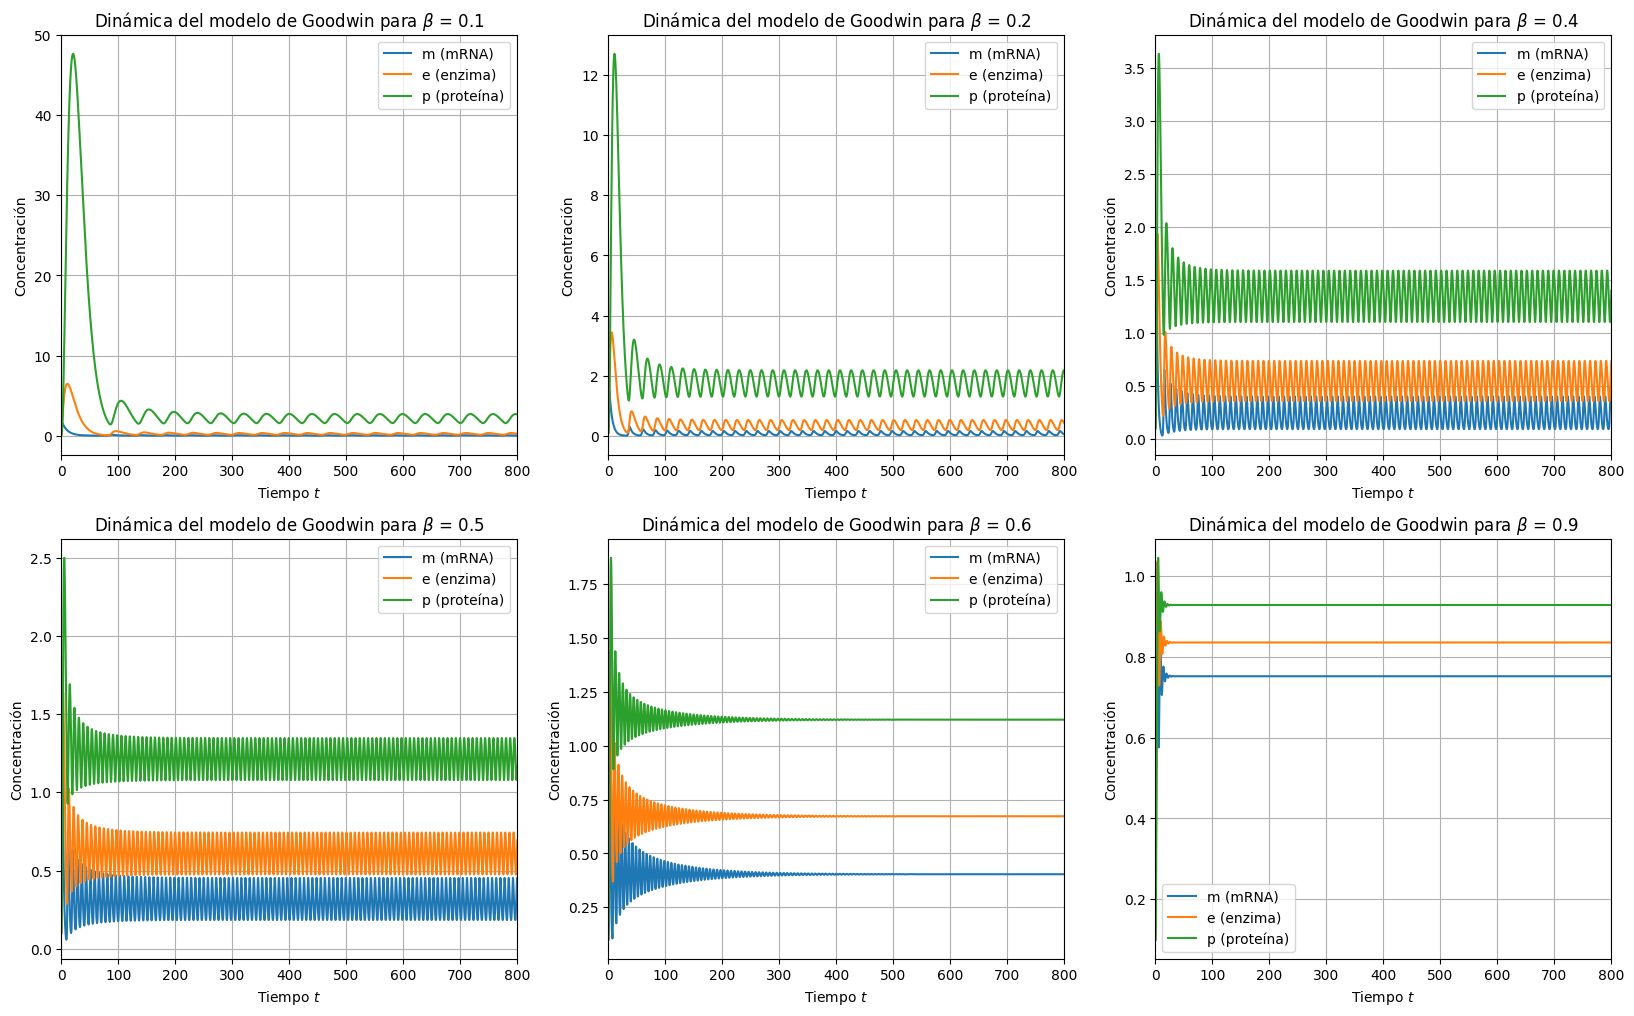

In [106]:
# h = 10.0 
alpha_m = 1.0
alpha_e = 1.0
alpha_p = 1.0
a = 1.0
b = 1.0
c = 1.0
beta = [0.1, 0.2, 0.4, 0.5, 0.6, 0.9]  
h = 10.0  # Exponente de Hill

model_instance = []
for beta_ in beta:
    model_instance.append(goodwin_model(alpha_m, beta_, alpha_e, beta_, alpha_p, beta_, a, b, c, h))

# Condiciones iniciales
y0 = [0.1, 0.1, 0.1]
# Vector de tiempo
t = np.linspace(0, 1000, 5000)

solution = []
for model_instance_ in model_instance:
    solution.append(odeint(model_instance_.model, y0, t))
#Gráficas
plt.figure(figsize=(20, 12))
for i in range(len(beta)):
    plt.subplot(2, 3, i+1)
    m = solution[i][:, 0]
    e = solution[i][:, 1]
    p = solution[i][:, 2]

    plt.plot(t, m, label='m (mRNA)')
    plt.plot(t, e, label='e (enzima)')
    plt.plot(t, p, label='p (proteína)')
    plt.xlabel(f'Tiempo $t$')
    plt.ylabel(f'Concentración')
    plt.title(f'Dinámica del modelo de Goodwin para $\\beta$ = {beta[i]}')
    plt.xlim(0, 800)
    plt.legend()
    plt.grid(True)

Para $h=10.0$ ocurre un fenómeno distinto ya que al aumentar las degradaciones $\beta$, aumentan las oscilaciones y se sostienen en el tiempo hasta $\beta=0.5$ (aproximadamente) y luego para valores mayores de $\beta$ sí se amortiguan las oscilaciones.

# 2. Switch genético

Estudie la dinámica de un sistema de dos genes con represión mutua:
\begin{align}
\frac{dm_1}{dt} &= \alpha_m g_R(p_2) − \beta_m m_1, \\
\frac{dm_2}{dt} &= \alpha_m g_R(p_1) − \beta_m m_2, \\
\frac{dp_1}{dt} &= \alpha_p m_1 − \beta_p p_1, \\
\frac{dp_2}{dt} &= \alpha_p m_2 − \beta_p p_2,
\end{align}
donde las tasas y las funciones de represión son iguales para las especies 1 y 2 para simplificar. Usando la condición $\beta_m \gg \beta_p$ reduzca el sistema a dos variables, y analice la dinámica en el espacio de fases reducido a las proteínas. Estudie la bifurcación que produce la sensibilidad en la función de represión (controlada por $b$ o $c$).

In [107]:
#Librerias
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from models import switch_genetico

En primer lugar, utilizando la condición $\beta_m \gg \beta_p$, es decir que el mRNA se degrada mucho más rápido que las proteínas, podemos suponer que, en la escala de tiempo de evolución de la proteína, el mRNA ya llegó al estacionario, por lo tanto $\frac{dm_1}{dt} = \frac{dm_2}{dt} \approx 0$. Luego, reemplazando en (1)  y (2) llegamos a 

\begin{align*}
    m_1 &= \frac{\alpha_m}{\beta_m} g_R \left( p_2 \right), \\
    m_2 &= \frac{\alpha_m}{\beta_m} g_R \left( p_1 \right).
\end{align*}

Entonces, reemplazando $m_1$ y $m_2$ en (3) y (4) podemos reducir el sistema a dos variables
\begin{align*}
    \frac{dp_1}{dt} &= \frac{\alpha_p \alpha_m}{\beta_m} g_R \left( p_2 \right) - \beta_p p_1,\\
    \frac{dp_2}{dt} &= \frac{\alpha_p \alpha_m}{\beta_m} g_R \left( p_1 \right) - \beta_p p_2.
\end{align*}

Por lo tanto el estado estacionario del sistema se obtiene pidiendo $\frac{dp_1}{dt} = \frac{dp_2}{dt} = 0$

\begin{align*}
    p_1^* &= \frac{\alpha_p \alpha_m}{\beta_p \beta_m} g_R \left(p_2 \right), \\
    p_2^* &= \frac{\alpha_p \alpha_m}{\beta_p \beta_m} g_R \left(p_1 \right).
\end{align*}

Para estudiar la estabilidad del sistema graficamos las nullclinas. Como sabemos la intersección de las mismas nos dan los puntos de equilibrio y los campos vectoriales de las derivadas nos dará la estabilidad de dichos puntos. Además, dejando fijos los párametros $\alpha_m = \alpha_p = 1$, $\beta_m = \beta_p = 0.1$ y las constantes $a = c = 1$, y tomando $b$ como parámetro de control podemos estudiar las bifurcaciones del sistema.

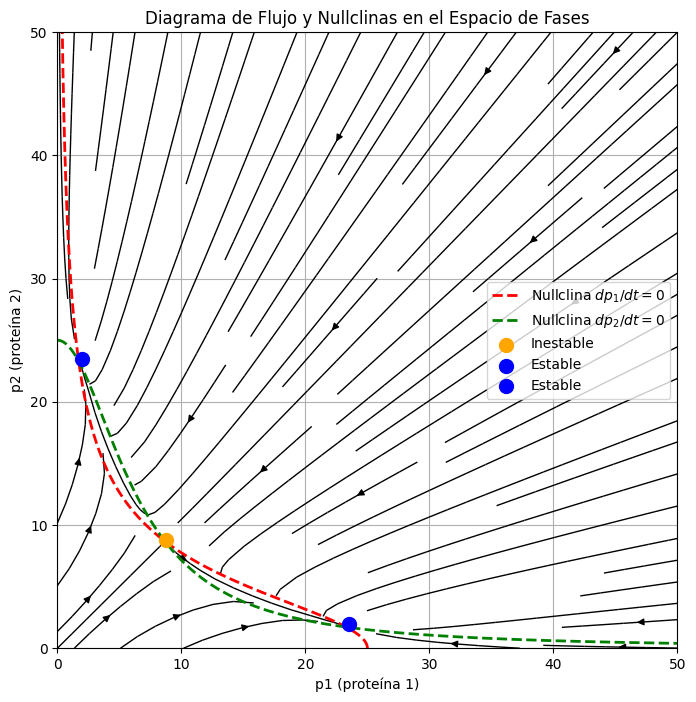

In [108]:
# Parámetros del sistema
alpha_m = 1.0
alpha_p = 1.0
a = 1.0
b = 40.0
c = 1.0
beta_m = 1  # Usando la condición \beta_m >> \beta_p
beta_p = 0.001
h = 2.0  # Exponente de Hill

# Crear una instancia del modelo
model_instance = switch_genetico(alpha_m, beta_m, alpha_p, beta_p, a, b, c, h)

# Crear malla para el espacio de fases
p1_range = np.linspace(0, 100, 1000)
p2_range = np.linspace(0, 100, 1000)
P1, P2 = np.meshgrid(p1_range, p2_range)

# Calcular las derivadas de p1 y p2 en cada punto del espacio de fases
dp1_dt, dp2_dt = model_instance.model_reducido([P1, P2], 0)

# Calcular las nullclinas
nullclina1 = model_instance.nullclina_p1(p2_range)
nullclina2 = model_instance.nullclina_p2(p1_range)

# Graficar el diagrama de flujo (campo vectorial) y las nullclinas
plt.figure(figsize=(8, 8))
plt.streamplot(P1, P2, dp1_dt, dp2_dt, color='k', linewidth=1, density=2)
plt.plot(nullclina1, p2_range, color='red', linestyle='--',  linewidth=2, label=f'Nullclina $dp_1/dt = 0$')
plt.plot(p1_range, nullclina2, color='green', linestyle='--',  linewidth=2, label=f'Nullclina $dp_2/dt = 0$')
plt.xlabel('p1 (proteína 1)')
plt.ylabel('p2 (proteína 2)')
plt.title('Diagrama de Flujo y Nullclinas en el Espacio de Fases')
plt.scatter(8.75, 8.75, color='orange', s=100, zorder=5, label = 'Inestable')
plt.scatter(23.5, 2, color='blue', s=100, zorder=5, label = 'Estable')
plt.scatter(2, 23.5, color='blue', s=100, zorder=5, label = 'Estable')
plt.legend()
plt.xlim(0,50)
plt.ylim(0,50)
plt.grid(True)
plt.show()

Para $b=40$ tenemos dos puntos de equilibrio estable que refieren a la supresión de un gen por encima de otro y un punto de equilibrio inestable donde ambos genes están activos.

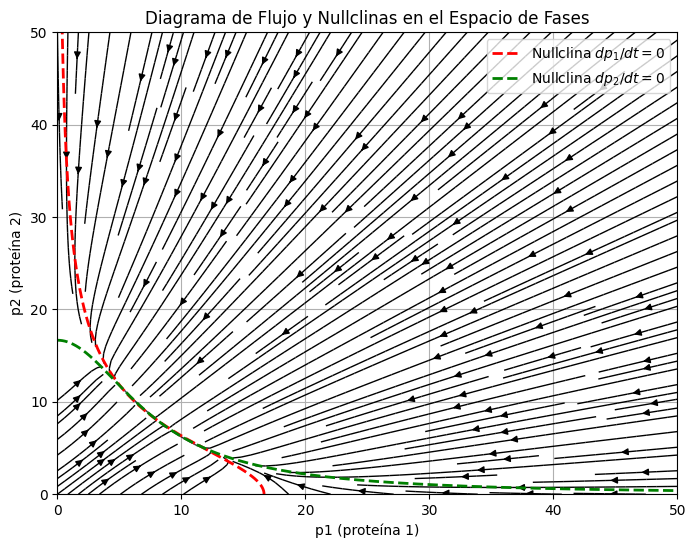

In [109]:
# Parámetros del sistema
alpha_m = 1.0
alpha_p = 1.0
a = 1.0
b = 60.0
c = 1.0
beta_m = 1  # Usando la condición \beta_m >> \beta_p
beta_p = 0.001
h = 2.0  # Exponente de Hill

# Crear una instancia del modelo
model_instance = switch_genetico(alpha_m, beta_m, alpha_p, beta_p, a, b, c, h)

# Crear malla para el espacio de fases
p1_range = np.linspace(0, 50, 1000)
p2_range = np.linspace(0, 50, 1000)
P1, P2 = np.meshgrid(p1_range, p2_range)

# Calcular las derivadas de p1 y p2 en cada punto del espacio de fases
dp1_dt, dp2_dt = model_instance.model_reducido([P1, P2], 0)

# Calcular las nullclinas
nullclina1 = model_instance.nullclina_p1(p2_range)
nullclina2 = model_instance.nullclina_p2(p1_range)

# Graficar el diagrama de flujo (campo vectorial) y las nullclinas
plt.figure(figsize=(8, 6))
plt.streamplot(P1, P2, dp1_dt, dp2_dt, color='k', linewidth=1, density=2)
plt.plot(nullclina1, p2_range, color='red', linestyle='--',  linewidth=2, label=f'Nullclina $dp_1/dt = 0$')
plt.plot(p1_range, nullclina2, color='green', linestyle='--',  linewidth=2, label=f'Nullclina $dp_2/dt = 0$')
plt.xlabel('p1 (proteína 1)')
plt.ylabel('p2 (proteína 2)')
plt.title('Diagrama de Flujo y Nullclinas en el Espacio de Fases')
plt.legend()
plt.xlim(0,50)
plt.ylim(0,50)
plt.grid(True)
plt.show()

Para $b=60$ vemos que se produce (aproximadamente) la bifurcación donde los dos equilibrios estables desaparecen dando lugar a un único punto estable como veremos a continuación.

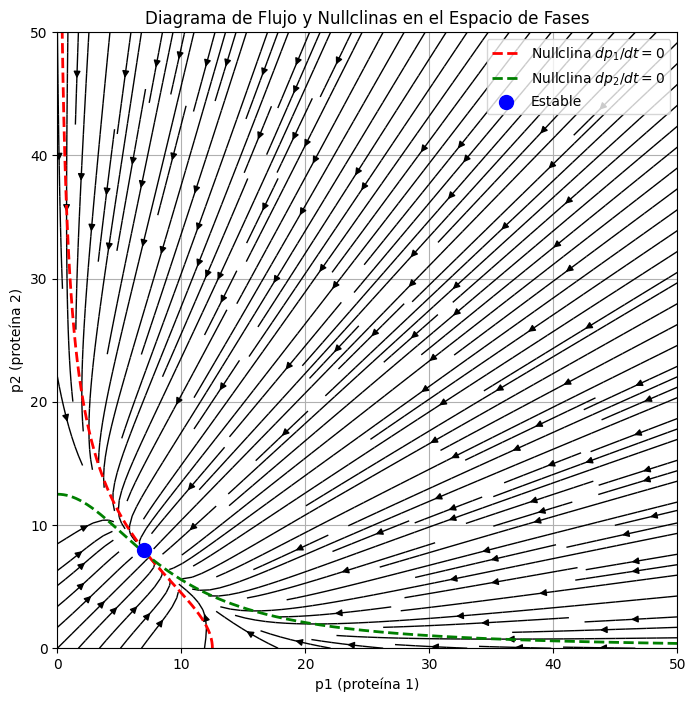

In [110]:
# Parámetros del sistema
alpha_m = 1.0
alpha_p = 1.0
a = 1.0
b = 80.0
c = 1.0
beta_m = 1  # Usando la condición \beta_m >> \beta_p
beta_p = 0.001
h = 2.0  # Exponente de Hill

# Crear una instancia del modelo
model_instance = switch_genetico(alpha_m, beta_m, alpha_p, beta_p, a, b, c, h)

# Crear malla para el espacio de fases
p1_range = np.linspace(0, 50, 1000)
p2_range = np.linspace(0, 50, 1000)
P1, P2 = np.meshgrid(p1_range, p2_range)

# Calcular las derivadas de p1 y p2 en cada punto del espacio de fases
dp1_dt, dp2_dt = model_instance.model_reducido([P1, P2], 0)

# Calcular las nullclinas
nullclina1 = model_instance.nullclina_p1(p2_range)
nullclina2 = model_instance.nullclina_p2(p1_range)


# Graficar el diagrama de flujo (campo vectorial) y las nullclinas
plt.figure(figsize=(8, 8))
plt.streamplot(P1, P2, dp1_dt, dp2_dt, color='k', linewidth=1, density=2)
plt.plot(nullclina1, p2_range, color='red', linestyle='--',  linewidth=2, label=f'Nullclina $dp_1/dt = 0$')
plt.plot(p1_range, nullclina2, color='green', linestyle='--',  linewidth=2, label=f'Nullclina $dp_2/dt = 0$')
plt.xlabel('p1 (proteína 1)')
plt.ylabel('p2 (proteína 2)')
plt.title('Diagrama de Flujo y Nullclinas en el Espacio de Fases')
plt.scatter(7, 8, color='blue', s=100, zorder=5, label = 'Estable')
plt.legend()
plt.xlim(0,50)
plt.ylim(0,50)
plt.grid(True)
plt.show()

Para $b=80$ tenemos un punto fijo estable correspondiente a la coexistencia de ambos genes activos

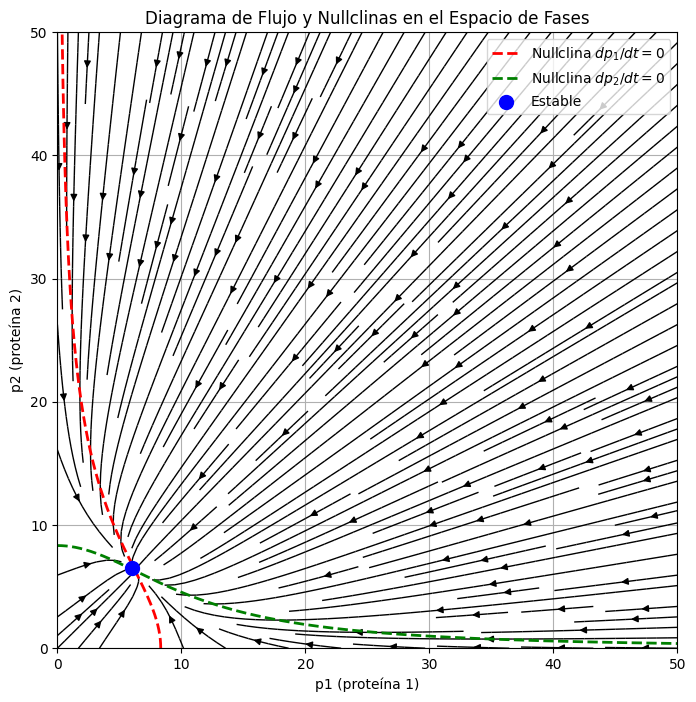

In [111]:
# Parámetros del sistema
alpha_m = 1.0
alpha_p = 1.0
a = 1.0
b = 120.0
c = 1.0
beta_m = 1  # Usando la condición \beta_m >> \beta_p
beta_p = 0.001
h = 2.0  # Exponente de Hill

# Crear una instancia del modelo
model_instance = switch_genetico(alpha_m, beta_m, alpha_p, beta_p, a, b, c, h)

# Crear malla para el espacio de fases
p1_range = np.linspace(0, 50, 1000)
p2_range = np.linspace(0, 50, 1000)
P1, P2 = np.meshgrid(p1_range, p2_range)

# Calcular las derivadas de p1 y p2 en cada punto del espacio de fases
dp1_dt, dp2_dt = model_instance.model_reducido([P1, P2], 0)

# Calcular las nullclinas
nullclina1 = model_instance.nullclina_p1(p2_range)
nullclina2 = model_instance.nullclina_p2(p1_range)


# Graficar el diagrama de flujo (campo vectorial) y las nullclinas
plt.figure(figsize=(8, 8))
plt.streamplot(P1, P2, dp1_dt, dp2_dt, color='k', linewidth=1, density=2)
plt.plot(nullclina1, p2_range, color='red', linestyle='--',  linewidth=2, label=f'Nullclina $dp_1/dt = 0$')
plt.plot(p1_range, nullclina2, color='green', linestyle='--',  linewidth=2, label=f'Nullclina $dp_2/dt = 0$')
plt.xlabel('p1 (proteína 1)')
plt.ylabel('p2 (proteína 2)')
plt.title('Diagrama de Flujo y Nullclinas en el Espacio de Fases')
plt.scatter(6, 6.5, color='blue', s=100, zorder=5, label = 'Estable')
plt.legend()
plt.xlim(0,50)
plt.ylim(0,50)
plt.grid(True)
plt.show()

Si continuamos aumentando $b$, vemos que se sigue teniendo un solo punto fijo estable.